## Análisis de Información Recopilada - Clase Espejo Logro Académico

### Paso 1: Cargue de librerías

In [1]:
import warnings
warnings.filterwarnings('ignore')

##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

### Cargue de la data

In [2]:
datos = pd.read_csv('./datosFinalesL.csv', sep=';', encoding='latin1')
datos.head()
datos.shape

(103, 26)

### Paso 2: Pre procesamiento de la data

In [3]:
##Renombrar las columnas
datos.columns = ['DemoEstrato','DemoEdad','DemoGenero','DemoSemestre','DemoPadres','DemoLaborando','DemoEsMental','DemoEsFisico','DemoTrabajo','Pedag1','Pedag2','Pedag3','Pedag4','Pedag5','Pedag6','Pedag7','Pedag8','Pedag9','Pedag10','Pedag11','Pedag12','Pedag13','Pedag14','Pedag15','Pedag16','LogroAca']
datos.head()

data = datos.drop(['LogroAca'],axis=1)

In [4]:
##Demográficos
round(datos.DemoEstrato.value_counts()/np.float64(len(datos)),2)*100

##El 63% de la población es de estrato 2, 21% estrato 1 y el restante 16% estrato 3,4 y 5

DemoEstrato
2    63.0
1    21.0
3    10.0
4     4.0
5     2.0
Name: count, dtype: float64

In [5]:
round(datos.DemoEdad.value_counts()/np.float64(len(datos)),2)*100
#El 63% de la población se encuentran en el rango de edad 21 a 25 años
#El 21% entre 17 -20 años y el restante 16% son mayores de 25 años.

DemoEdad
2    63.0
1    21.0
3    16.0
Name: count, dtype: float64

In [6]:
round(datos.DemoGenero.value_counts()/np.float64(len(datos)),2)*100
#El 65% de los encuestados son hombres y el 35% son mujeres

DemoGenero
1    65.0
2    35.0
Name: count, dtype: float64

In [7]:
round(datos.DemoSemestre.value_counts()/np.float64(len(datos)),2)*100
#El 45% de las personas encuestadas pertenecen a decimo semestre, el 21% al noveno semestre, el 18% a septimo semestre y el 16% final a quinto semestre.

DemoSemestre
10    45.0
9     21.0
7     18.0
5     16.0
Name: count, dtype: float64

In [8]:
pd.crosstab(datos.DemoGenero, datos.DemoPadres, margins=True, margins_name="Total")
  #37 estudiantes del género masculino no viven con sus padres actualmente, 30 estudiantes del género masculino si conviven con sus padres
  #En el caso de las mujeres la relación es 17 no viven con sus padres y 19 si lo hacen actualmente.

DemoPadres,0,1,Total
DemoGenero,,,
1,37,30,67
2,17,19,36
Total,54,49,103


In [9]:
pd.crosstab(datos.DemoEstrato, datos.DemoPadres, margins=True, margins_name="Total")
#54 estudiantes de estratos 1 y 2 es donde se encuentran el mayor número que no vive con los padres.

DemoPadres,0,1,Total
DemoEstrato,,,
1,14,8,22
2,34,31,65
3,5,5,10
4,1,3,4
5,0,2,2
Total,54,49,103


In [10]:
pd.crosstab(datos.DemoEstrato, datos.DemoLaborando, margins=True, margins_name="Total")
#68 personas de los estratos 1,2,3,4 y5 no se encuentran laborando actualmente. 
# Los estratos 1 y 2 son los que mayor cantidad poblacional tienen en esa situacion

DemoLaborando,0,1,Total
DemoEstrato,,,
1,15,7,22
2,40,25,65
3,9,1,10
4,3,1,4
5,1,1,2
Total,68,35,103


In [11]:
pd.crosstab(datos.DemoGenero, datos.DemoEsMental, margins=True, margins_name="Total")
#41 hombres aducen que su trabajo no implica esfuerzo mental de igual manera 27 mujeres confirman la misma tendencia.

DemoEsMental,0,2,3,4,5,Total
DemoGenero,,,,,,
1,41,1,9,8,8,67
2,27,1,6,2,0,36
Total,68,2,15,10,8,103


### Paso 3: Gráficas mas Relevantes

In [12]:
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
def drawChart(dim, column1, column2, texto1, texto2, explod, preguntaC, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=18, weight='bold')
    
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(['4 Siempre', '3 Casi siempre', '2 Algunas Veces','1 Casi Nunca', '0 Nunca'],loc=2, fontsize=10)
    
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(x= column1, data=datos,hue=column2,  ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    
    plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'], fontsize=10)
    plt.show() 

def drawChart2(dim, column1, column2, texto2, question, sizes):
  f, ax = plt.subplots(figsize=(sizes[0],sizes[1]))
  f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, question), x= 0.5, y =1.05, fontsize=18, weight='bold')

  plot = sns.countplot(x= column2, data=datos,hue=column1, palette=colors)
  for i in plot.patches:
      plot.annotate(i.get_height(),
                    (i.get_x() + i.get_width()/2, i.get_height()),
                    ha='center', va='baseline', fontsize=12, 
                    color='black', xytext=(0,1),
                    textcoords='offset points')
  ax.set_title(texto2,fontsize=14)
  ax.set_xlabel('', fontsize=12)
  ax.set_ylabel('', fontsize=12)
  ax.tick_params(labelsize=14)
  
  plt.legend(labels = ['0 Nunca', '1 Casi Nunca','2 Algunas Veces', '3 Casi siempre','4 Siempre'],fontsize=10)
  plt.show() 


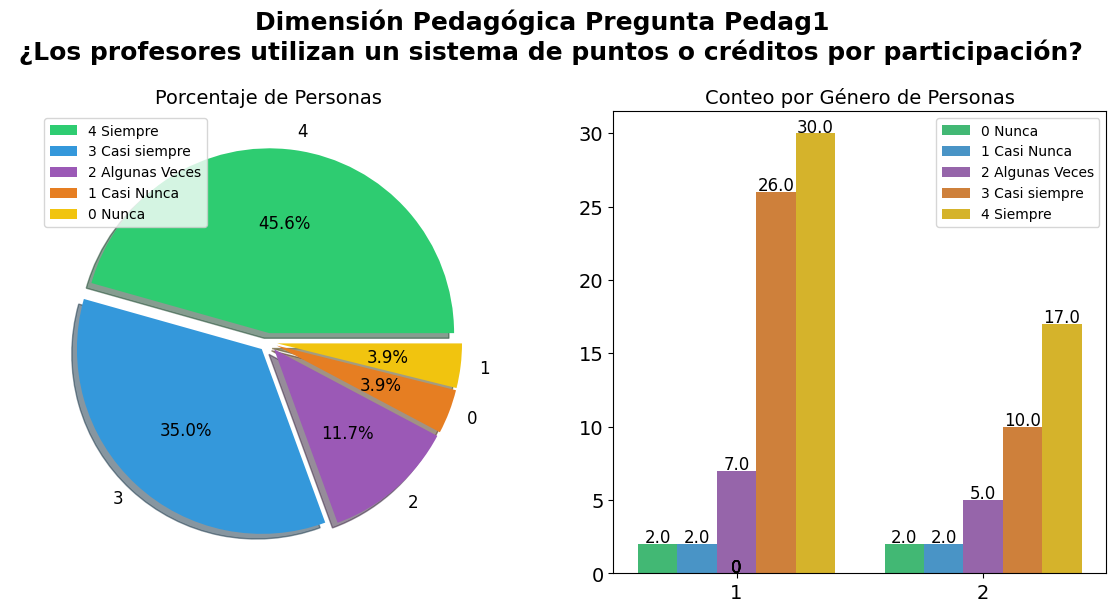

In [13]:
drawChart('Pedagógica','DemoGenero','Pedag1', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05, 0.05, 0.05,0.05), 
          '¿Los profesores utilizan un sistema de puntos o créditos por participación?', sizes=[14,6])
#0 Nunca 
#1 Casi nunca 
#2 Algunas veces  
#3 Casi siempre 
#4 Siempre 
#el 45,6% de los encuestados aducen que los docentes si utilizan un sistema de puntos o créditos por participación en la clase espejo.
#Un 8% aduce que nunca se utiliza dicho sistema.

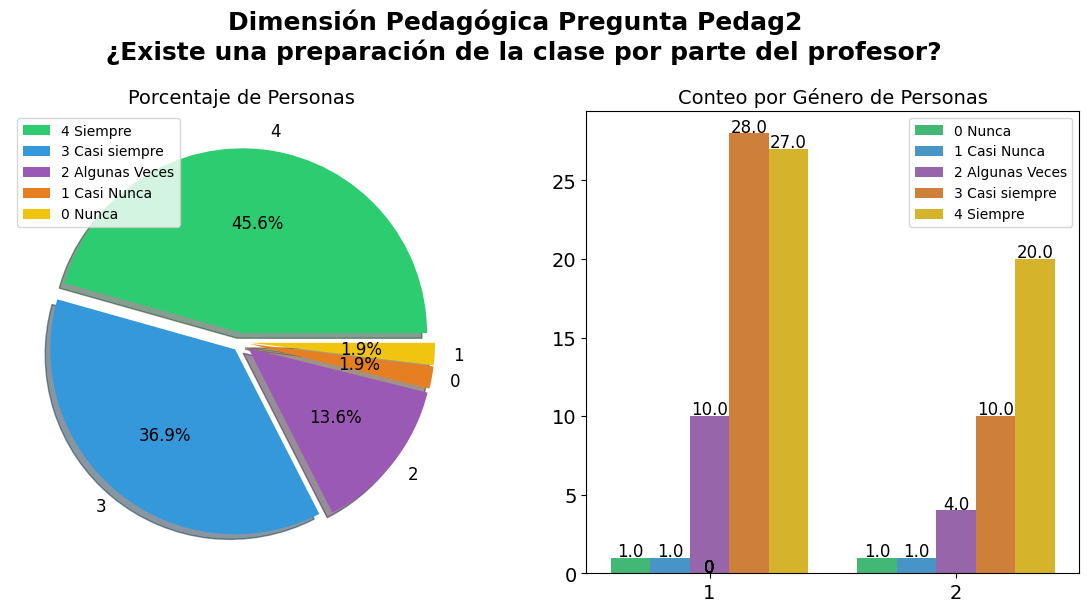

In [14]:
drawChart('Pedagógica','DemoGenero','Pedag2', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Existe una preparación de la clase por parte del profesor?', sizes=[14,6])
          #el 45,6% de los encuestados aducen que los docentes casi siempre preparan la clase espejo a impartir. Un 4% reconoce que no existe preparación 
          #para dicho encuentro.

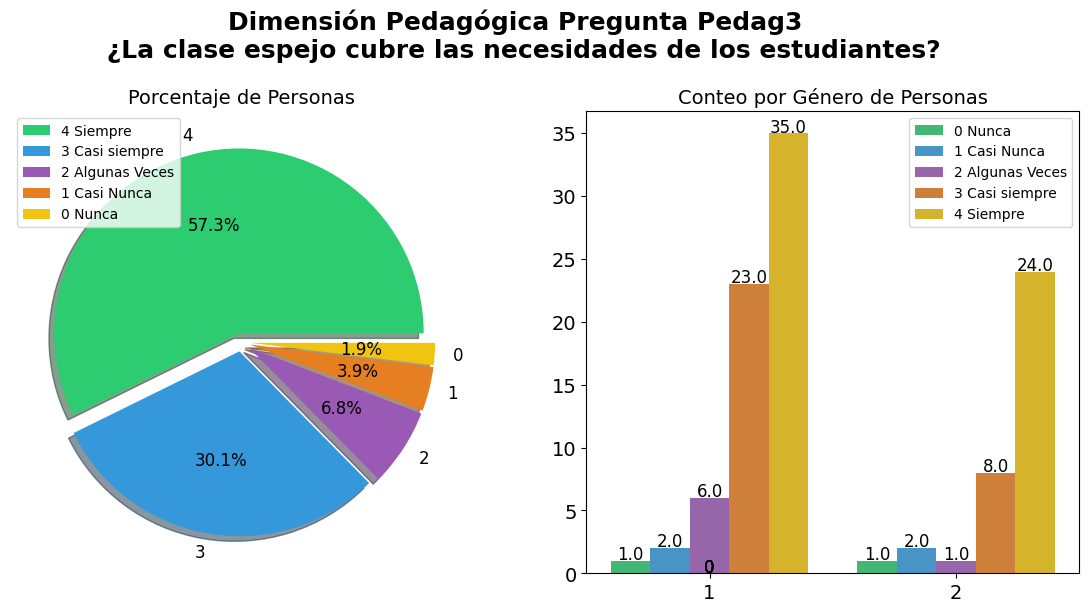

In [15]:
drawChart('Pedagógica','DemoGenero','Pedag3', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La clase espejo cubre las necesidades de los estudiantes?', sizes=[14,6])
          #El 57.3% de las personas aducen que casi siempre se cubre con las necesidades de los estudiantes en la clase espejo.

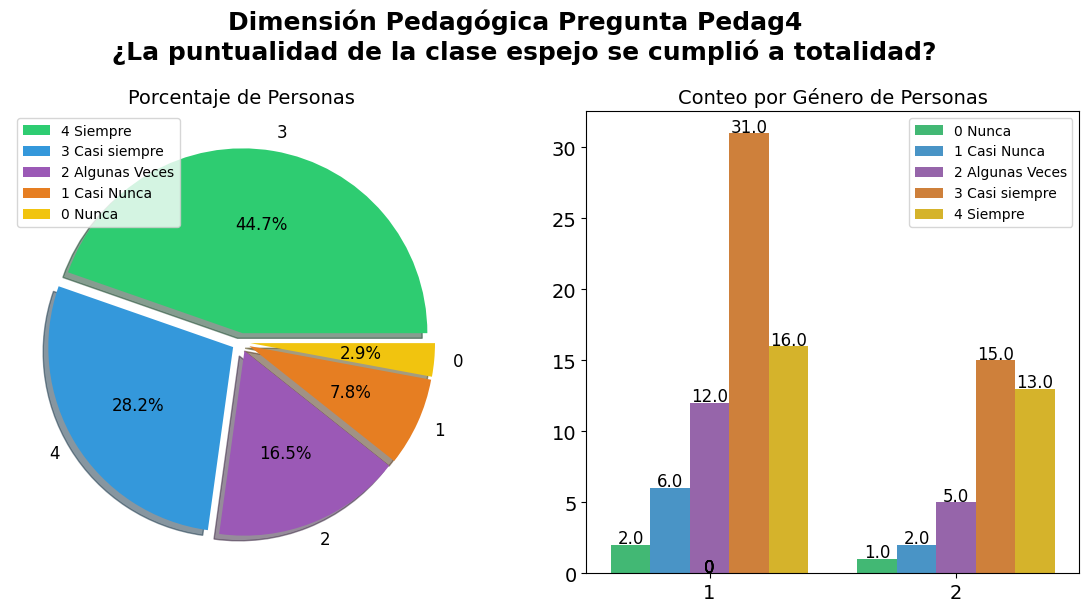

In [16]:
drawChart('Pedagógica','DemoGenero','Pedag4', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿La puntualidad de la clase espejo se cumplió a totalidad?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que casi siempre se cumple con el horario de la clase espejo. Un 11% aduce que no se cumple con los horarios
#pactados

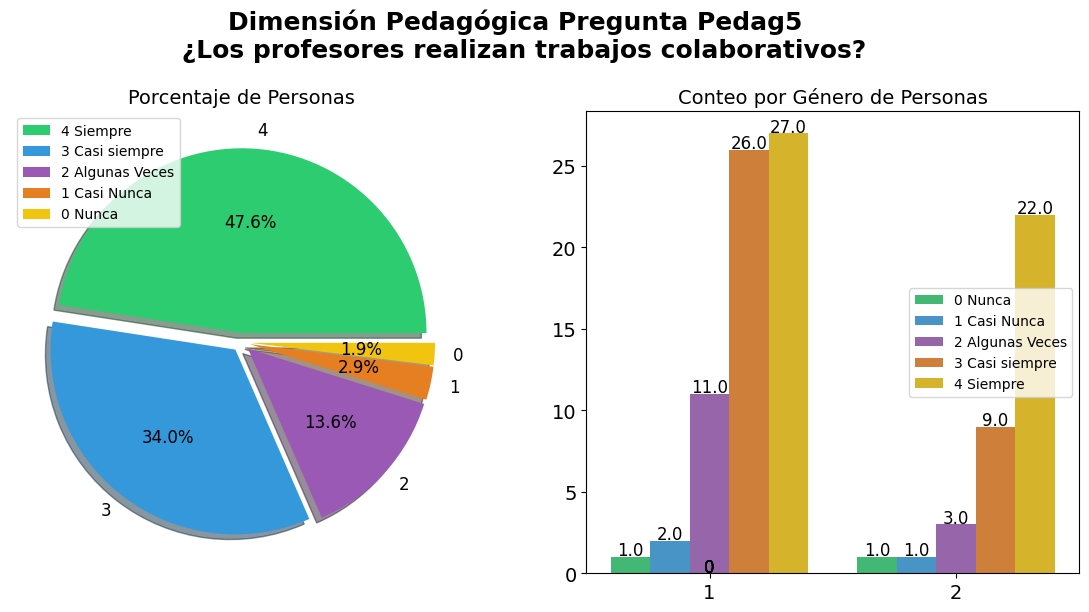

In [17]:
drawChart('Pedagógica','DemoGenero','Pedag5', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores realizan trabajos colaborativos?', sizes=[14,6])
#Algunas veces los profesores realizan trabajos colaborativos durante la clase espejo con un 13,6% de los estudiantes lo afirman

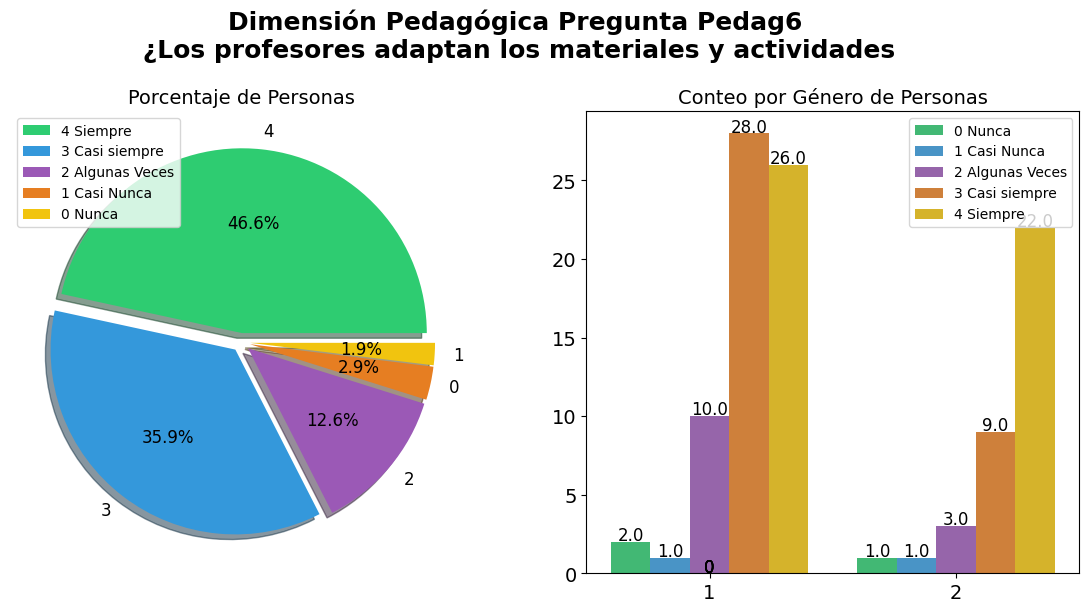

In [18]:
drawChart('Pedagógica','DemoGenero','Pedag6', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores adaptan los materiales y actividades ', sizes=[14,6])
# 

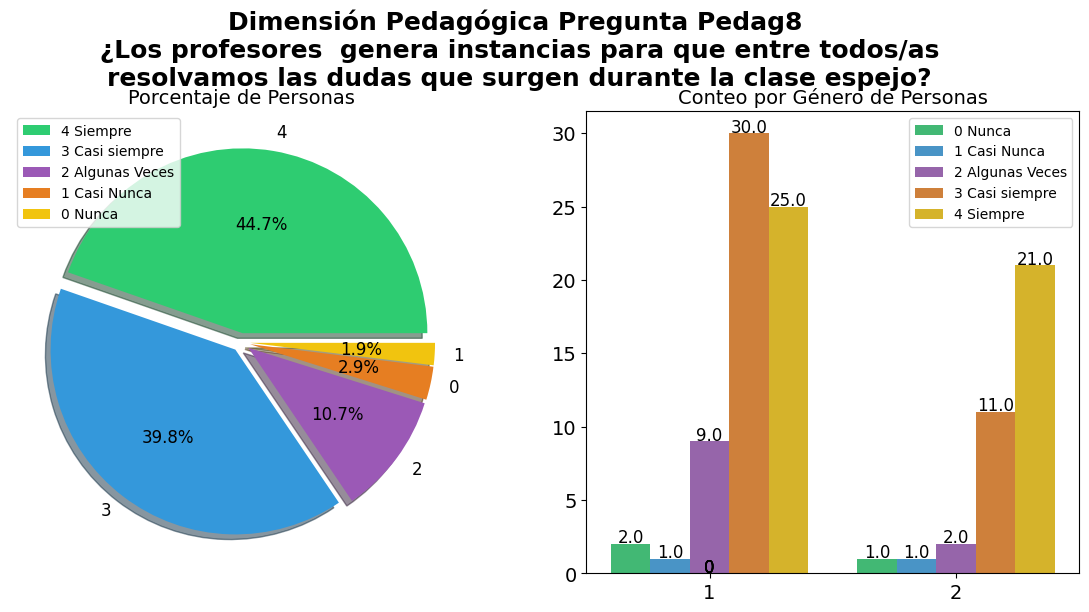

In [19]:
drawChart('Pedagógica','DemoGenero','Pedag8', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  genera instancias para que entre todos/as \nresolvamos las dudas que surgen durante la clase espejo?', sizes=[14,6])
##El 44,7% de los estudiantes afirman que siempre los profesores generan espacios para aclarar dudas.

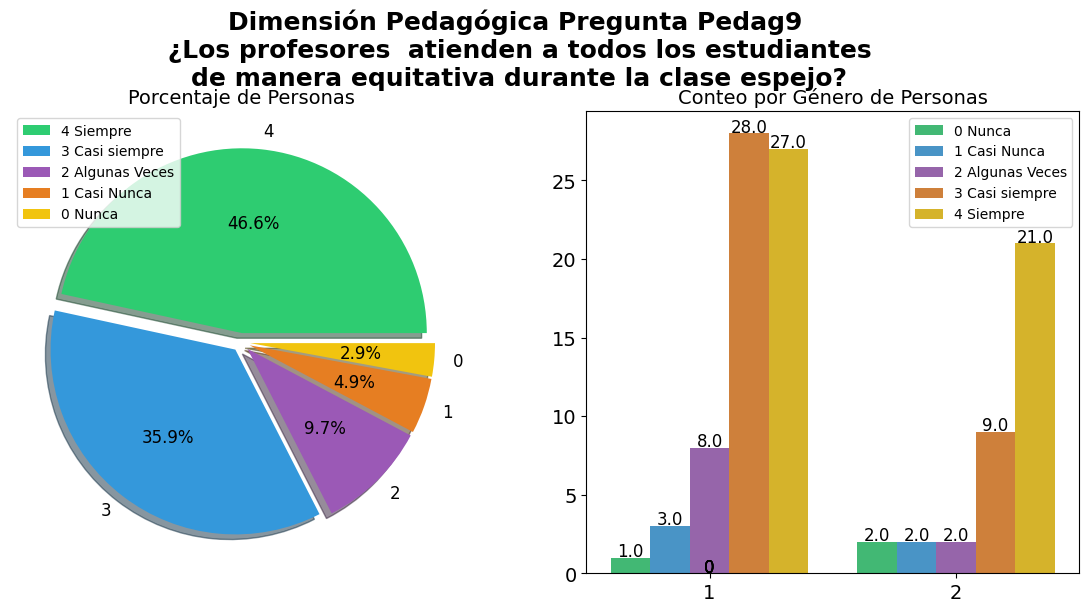

In [20]:
drawChart('Pedagógica','DemoGenero','Pedag9', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Los profesores  atienden a todos los estudiantes \nde manera equitativa durante la clase espejo?', sizes=[14,6])
          #9,7% de los estudiantes evidencian que no son atendidas sus dudas en las clases espejo.

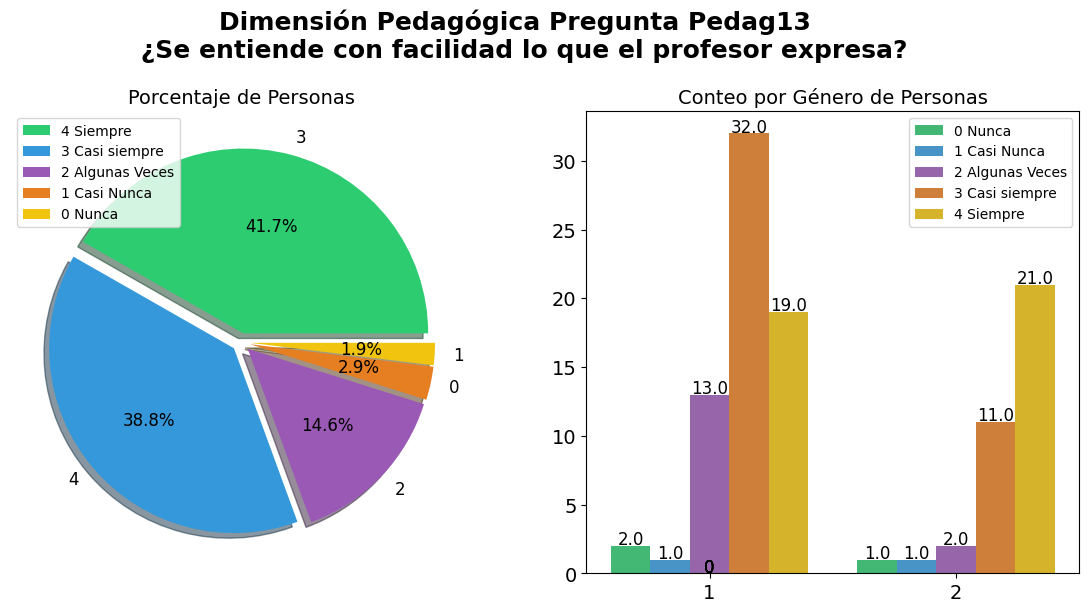

In [21]:
drawChart('Pedagógica','DemoGenero','Pedag13', 'Porcentaje de Personas', 'Conteo por Género de Personas', (0.05, 0.05,0.05, 0.05, 0.05), 
          '¿Se entiende con facilidad lo que el profesor expresa?', sizes=[14,6])
    #41,7% aducen que casi siempre se entiende lo que el profesor expresa.un 18% reconoce que no se entiende lo explicado por el docente.

In [22]:
datos['LogroAca'].value_counts()

LogroAca
Se cumple Aceptable     70
Se cumple Alto Grado    26
Se cumple Bajo Grado     7
Name: count, dtype: int64

### Paso 4: Normalización, Test de Normalidad, Correlación de Pearson y Alpha de Cronbach

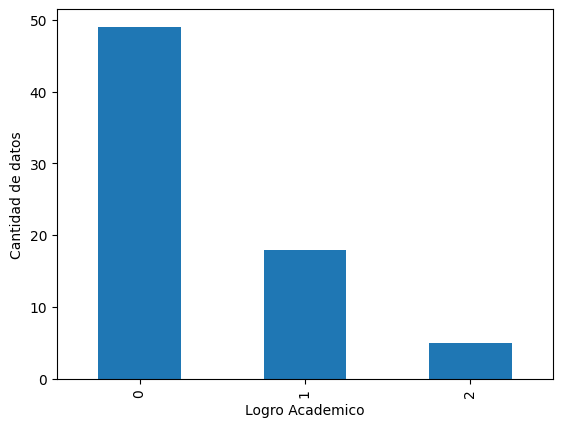

In [23]:

#!pip install scikit-plot
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datos['LogroAca']= label_encoder.fit_transform(datos['LogroAca']) 

## Balance de carga de variables
features = []
for feature in datos.columns:
    if feature != 'LogroAca':
        features.append(feature)
X = datos[features]
y = datos['LogroAca']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Academico')
plt.show()

## Balanceo de datos con RESAMPLE Clase MAYORITARIA

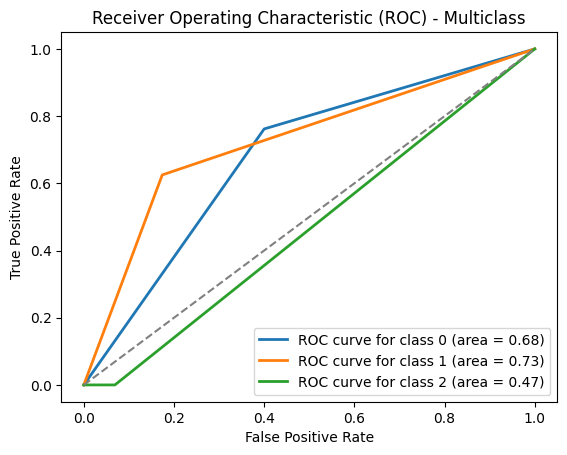

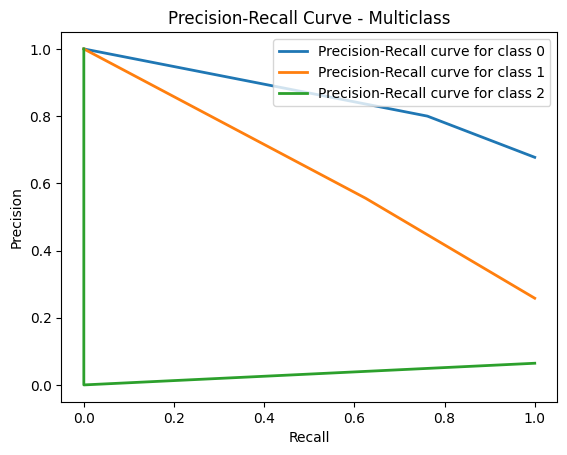

In [24]:
#!pip install scikit-plot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import label_binarize
import numpy as np

# Binariza las etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Entrena el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# Graficar curva ROC y Precision-Recall para cada clase
for i in range(n_classes):
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Graficar curva Precision-Recall para cada clase
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="upper right")
plt.show()

In [25]:
y_train.value_counts()

LogroAca
0    49
1    18
2     5
Name: count, dtype: int64

In [26]:
y_test.value_counts()

LogroAca
0    21
1     8
2     2
Name: count, dtype: int64

In [27]:
#!pip install -U imbalanced-learn
from sklearn.utils import resample
import pandas as pd

def balance_data(X_train, y_train, strategy='oversample', reference_counts=None):
    """
    Balancea los datos de entrenamiento utilizando resample para oversampling o undersampling.
    
    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    strategy (str): Método de balanceo a utilizar ('oversample' o 'undersample').
    reference_counts (dict, opcional): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                                        con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.
    
    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    if strategy not in ['oversample', 'undersample']:
        raise ValueError("El método debe ser uno de los siguientes: 'oversample' o 'undersample'")
    
    if reference_counts is None:
        raise ValueError("Debe proporcionar un diccionario 'reference_counts' con el número de muestras deseadas para cada categoría")
    
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    
    # Crear listas para almacenar los datos balanceados
    X_resampled = []
    y_resampled = []
    
    # Aplicar oversampling o undersampling según la estrategia especificada
    for category, count in reference_counts.items():
        X_category = X_train[y_train == category]
        y_category = y_train[y_train == category]
        
        if strategy == 'oversample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=True,     # muestra con reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        elif strategy == 'undersample':
            X_resampled_category, y_resampled_category = resample(X_category, 
                                                                  y_category,
                                                                  replace=False,    # muestra sin reemplazo
                                                                  n_samples=count,  # número de muestras deseadas
                                                                  random_state=42)  # para reproducibilidad
        
        X_resampled.append(X_resampled_category)
        y_resampled.append(y_resampled_category)
    
    # Concatenar todas las muestras resampleadas
    X_res = pd.concat(X_resampled)
    y_res = pd.concat(y_resampled)
    
    return X_res, y_res


# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 49, 1: 49, 2: 49}
X_res_train_over, y_res_train_over = balance_data(X_train, y_train, strategy='oversample', reference_counts=reference_counts)
print("Oversampling results:\n", y_res_train_over.value_counts())

reference_counts_d = {0: 21, 1: 21, 2: 21}
X_res_test_over, y_res_test_over = balance_data(X_test, y_test, strategy='oversample', reference_counts=reference_counts_d)
print("Oversampling results:\n", y_res_test_over.value_counts())

# Balancear los datos usando undersampling con referencia a las siguientes cantidades por categoría
#reference_counts = {0: 7, 1: 7, 2: 7}
#X_res_under, y_res_under = balance_data(X_train, y_train, strategy='undersample', reference_counts=reference_counts)
#print("Undersampling results:\n", y_res_under.value_counts())



Oversampling results:
 LogroAca
0    49
1    49
2    49
Name: count, dtype: int64
Oversampling results:
 LogroAca
0    21
1    21
2    21
Name: count, dtype: int64


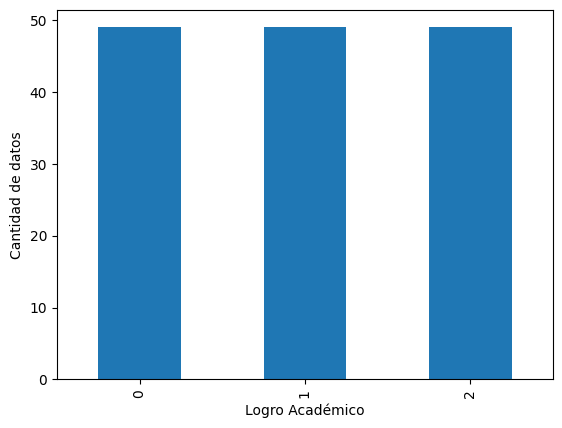

In [28]:
count = y_res_train_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

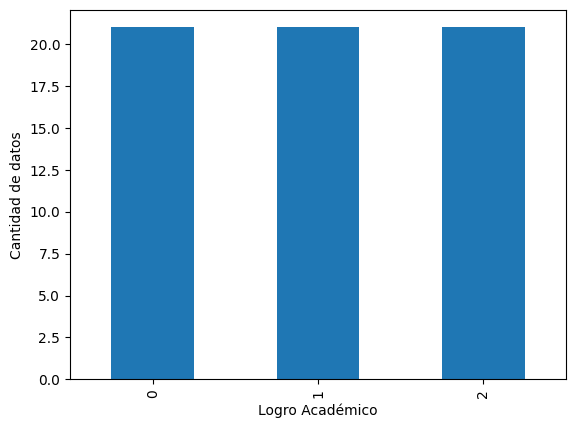

In [29]:
count = y_res_test_over.value_counts()
count.plot.bar()
plt.ylabel('Cantidad de datos')
plt.xlabel('Logro Académico')
plt.show()

In [30]:
from sklearn.utils import class_weight
clases = np.unique(y_res_train_over)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_res_train_over)
weights = dict(zip(clases,cw))

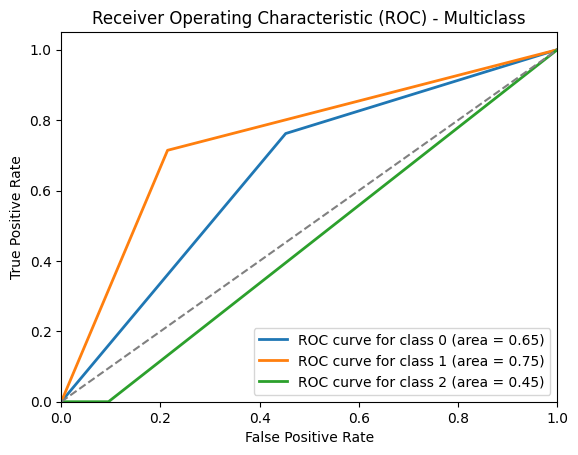

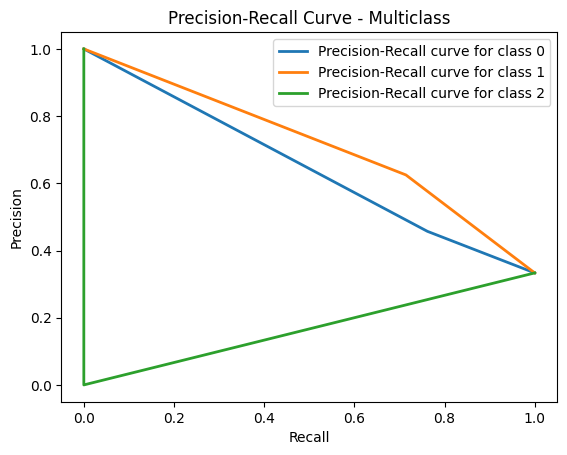

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar las etiquetas en formato One-vs-Rest (OvR)
y_res_test_binarized = label_binarize(y_res_test_over, classes=np.unique(y_res_test_over))
n_classes = y_res_test_binarized.shape[1]

# Entrenar el modelo
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_res_train_over, y_res_train_over)

# Obtener las probabilidades de predicción
y_score = model.predict_proba(X_res_test_over)

# Graficar la curva ROC para cada clase
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_res_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva de Precisión-Recall para cada clase
plt.figure()
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_res_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Multiclass')
plt.legend(loc="upper right")
plt.show()

### Balanceo de datos con clase mayoritaria SMOTE

Notas

    Verificar el número de muestras en cada clase antes y después de aplicar SMOTE es una buena práctica para asegurarse de que el sobremuestreo se ha realizado correctamente.
    Ajustar k_neighbors según el tamaño de la clase minoritaria es crucial para evitar el error mencionado.

    Ejemplo

Supongamos que tienes las siguientes clases y número de muestras:

    Clase 0: 5 muestras
    Clase 1: 50 muestras
    Clase 2: 100 muestras

En este caso, la clase minoritaria es la Clase 0 con 5 muestras.

El valor máximo de k_neighbors para SMOTE debe ser menor o igual a 5 - 1 = 4. Por lo tanto, k_neighbors debería ser 4 o menos.

In [32]:
from imblearn.over_sampling import SMOTE
import pandas as pd

def smote_oversample(X_train, y_train, reference_counts):
    """
    Balancea los datos de entrenamiento utilizando SMOTE para oversampling.
    
    Args:
    X_train (pd.DataFrame o np.ndarray): Conjunto de características de entrenamiento.
    y_train (pd.Series o np.ndarray): Conjunto de etiquetas de entrenamiento.
    reference_counts (dict): Número de muestras de referencia para cada categoría. Debe ser un diccionario
                             con claves como 0, 1 y 2, y valores correspondientes al número de muestras deseadas.
    
    Returns:
    X_res (pd.DataFrame), y_res (pd.Series): Conjuntos de datos balanceados en formato DataFrame y Series.
    """
    # Convertir X_train y y_train a DataFrame y Series si no lo son
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    
    # Definir la estrategia de SMOTE basada en los valores de referencia_counts
    smote = SMOTE(sampling_strategy=reference_counts, random_state=42, k_neighbors=4)
    
    # Aplicar SMOTE para generar el oversampling
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    # Convertir X_res y y_res a DataFrame y Series si no lo son
    if not isinstance(X_res, pd.DataFrame):
        X_res = pd.DataFrame(X_res, columns=X_train.columns)
    if not isinstance(y_res, pd.Series):
        y_res = pd.Series(y_res, name='target')
    
    return X_res, y_res

# Balancear los datos usando oversampling con referencia a las siguientes cantidades por categoría
reference_counts = {0: 49, 1: 49, 2: 49}
X_train_res_Smote, y_train_res_Smote = smote_oversample(X_train, y_train, reference_counts)
print("Oversampling results:\n", y_train_res_Smote.value_counts())



Oversampling results:
 LogroAca
0    49
1    49
2    49
Name: count, dtype: int64


In [33]:
from sklearn.utils import class_weight
clases = np.unique(y_train_res_Smote)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=clases, y=y_train_res_Smote)
weights = dict(zip(clases,cw))

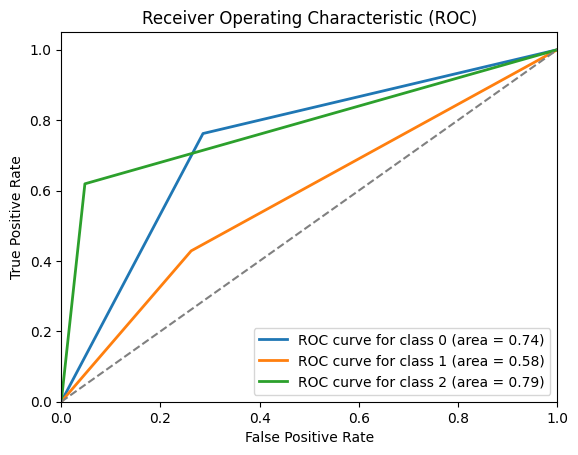

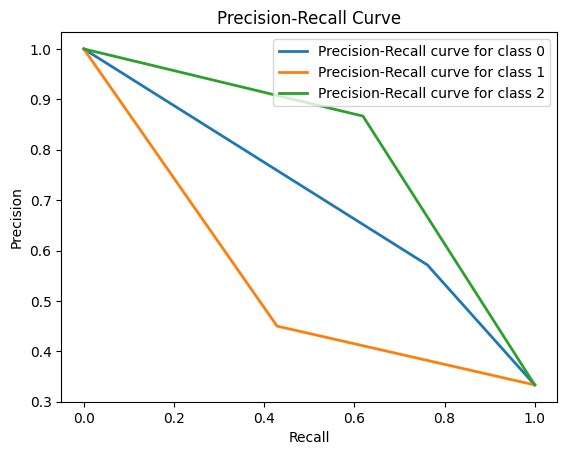

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Entrenar el modelo
model = DecisionTreeClassifier(class_weight=weights)
model.fit(X_train_res_Smote, y_train_res_Smote)

# Obtener las probabilidades de predicción
y_score = model.predict_proba(X_res_test_over)

# Verificar si el problema es multiclase
n_classes = len(np.unique(y_res_test_over))

if n_classes > 2:
    # Para problemas multiclase, binarizamos las etiquetas para aplicar One-vs-Rest
    y_res_test_binarized = label_binarize(y_res_test_over, classes=np.unique(y_res_test_over))
else:
    y_res_test_binarized = y_res_test_over

# Graficar la curva ROC para cada clase (en caso de multiclase)
plt.figure()
for i in range(n_classes):
    if n_classes > 2:
        fpr, tpr, _ = roc_curve(y_res_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')
    else:
        fpr, tpr, _ = roc_curve(y_res_test_binarized, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        break

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva de Precisión-Recall para cada clase (en caso de multiclase)
plt.figure()
for i in range(n_classes):
    if n_classes > 2:
        precision, recall, _ = precision_recall_curve(y_res_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Precision-Recall curve for class {i}')
    else:
        precision, recall, _ = precision_recall_curve(y_res_test_binarized, y_score[:, 1])
        plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve')
        break

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


## Resumen
mejoría de SMOTE por encima de imbalanced learn, pero faltán escoger las mejores características y crear los modelos.

    SMOTE (Synthetic Minority Over-sampling Technique):
        Pros:
            Genera muestras sintéticas que se asemejan a las muestras reales, lo que puede mejorar la calidad de los datos.
            Útil para conjuntos de datos desbalanceados donde las clases minoritarias están subrepresentadas.
        Contras:
            Puede generar muestras sintéticas que no reflejan fielmente la distribución de las clases minoritarias reales, lo que puede llevar a un sobreajuste.
            Requiere ajustar parámetros como k_neighbors, lo que puede ser un proceso de prueba y error.

    resample (de la librería sklearn.utils):
        Pros:
            Es más simple de usar y no requiere ajuste de parámetros.
            Puede ser más adecuado para conjuntos de datos pequeños o cuando se necesita un control más fino sobre el proceso de balanceo.
        Contras:
            No genera muestras sintéticas, lo que puede resultar en una pérdida de información si las clases minoritarias son muy escasas.

En general, si tienes un conjunto de datos desbalanceado y necesitas generar más muestras para las clases minoritarias, SMOTE podría ser una buena opción. Sin embargo, si prefieres una solución más simple o si tus clases minoritarias ya tienen suficientes muestras representativas, resample podría ser más adecuado.

SMOTE: X_train_res_Smote, y_train_res_Smote
RESAMPLE: X_res_train_over, y_res_train_over
TEST: X_res_test_over, y_res_test_over


#### Normalizar datos trabajados con SMOTE

In [35]:
datosVie = data
dataLista = X_train_res_Smote

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm_SMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [36]:
datosVie = data
dataLista = X_res_test_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm_SMOTE = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [37]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm_SMOTE)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,5.673933e-13,No es una variable Normal
1,DemoEdad,3.856539e-16,No es una variable Normal
2,DemoGenero,1.085619e-19,No es una variable Normal
3,DemoSemestre,7.044076e-14,No es una variable Normal
4,DemoPadres,1.130511e-17,No es una variable Normal
5,DemoLaborando,5.410206e-21,No es una variable Normal
6,DemoEsMental,1.707288e-17,No es una variable Normal
7,DemoEsFisico,4.336779e-18,No es una variable Normal
8,DemoTrabajo,1.561315e-17,No es una variable Normal
9,Pedag1,1.297698e-11,No es una variable Normal


In [38]:
iterarCol(X_test_norm_SMOTE)

df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,5.673933e-13,No es una variable Normal
1,DemoEdad,3.856539e-16,No es una variable Normal
2,DemoGenero,1.085619e-19,No es una variable Normal
3,DemoSemestre,7.044076e-14,No es una variable Normal
4,DemoPadres,1.130511e-17,No es una variable Normal
5,DemoLaborando,5.410206e-21,No es una variable Normal
6,DemoEsMental,1.707288e-17,No es una variable Normal
7,DemoEsFisico,4.336779e-18,No es una variable Normal
8,DemoTrabajo,1.561315e-17,No es una variable Normal
9,Pedag1,1.297698e-11,No es una variable Normal


In [39]:

corr_matrix = X_train_norm_SMOTE.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
158,DemoEsMental,DemoTrabajo,0.932286,0.932286
206,DemoTrabajo,DemoEsMental,0.932286,0.932286
207,DemoTrabajo,DemoEsFisico,0.930985,0.930985
183,DemoEsFisico,DemoTrabajo,0.930985,0.930985
181,DemoEsFisico,DemoEsMental,0.925230,0.925230
157,DemoEsMental,DemoEsFisico,0.925230,0.925230
541,Pedag13,Pedag8,0.906544,0.906544
421,Pedag8,Pedag13,0.906544,0.906544
443,Pedag9,Pedag10,0.902514,0.902514
467,Pedag10,Pedag9,0.902514,0.902514


Text(0.5, 1.0, 'Mapa de Correlación')

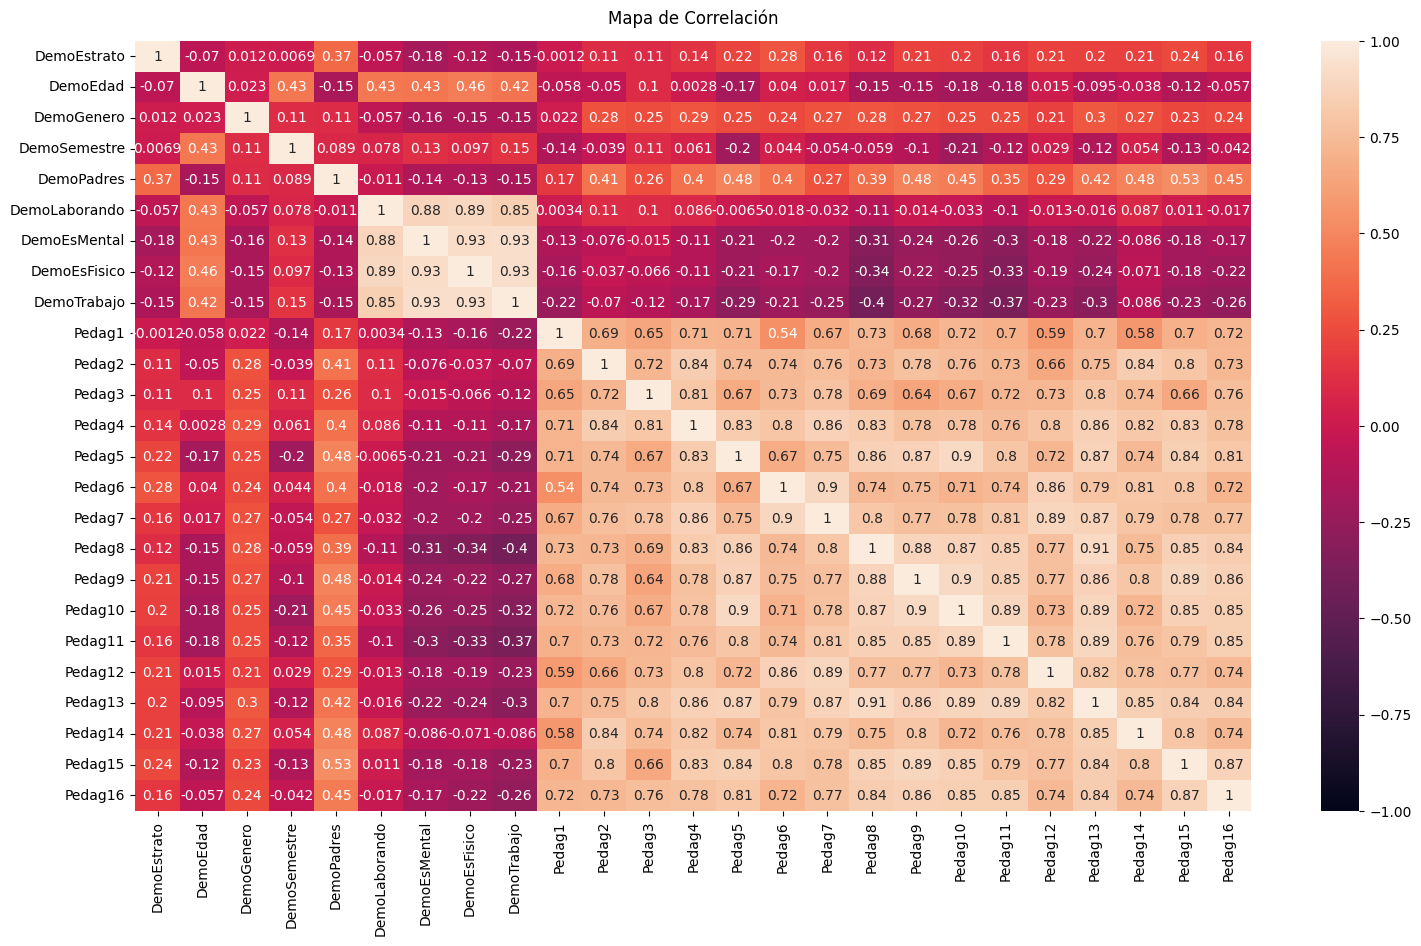

In [40]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [41]:
corr_matrix = X_train_norm_SMOTE.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
158,DemoEsMental,DemoTrabajo,0.932286,0.932286
206,DemoTrabajo,DemoEsMental,0.932286,0.932286
207,DemoTrabajo,DemoEsFisico,0.930985,0.930985
183,DemoEsFisico,DemoTrabajo,0.930985,0.930985
181,DemoEsFisico,DemoEsMental,0.925230,0.925230
157,DemoEsMental,DemoEsFisico,0.925230,0.925230
541,Pedag13,Pedag8,0.906544,0.906544
421,Pedag8,Pedag13,0.906544,0.906544
443,Pedag9,Pedag10,0.902514,0.902514
467,Pedag10,Pedag9,0.902514,0.902514


Text(0.5, 1.0, 'Mapa de Correlación')

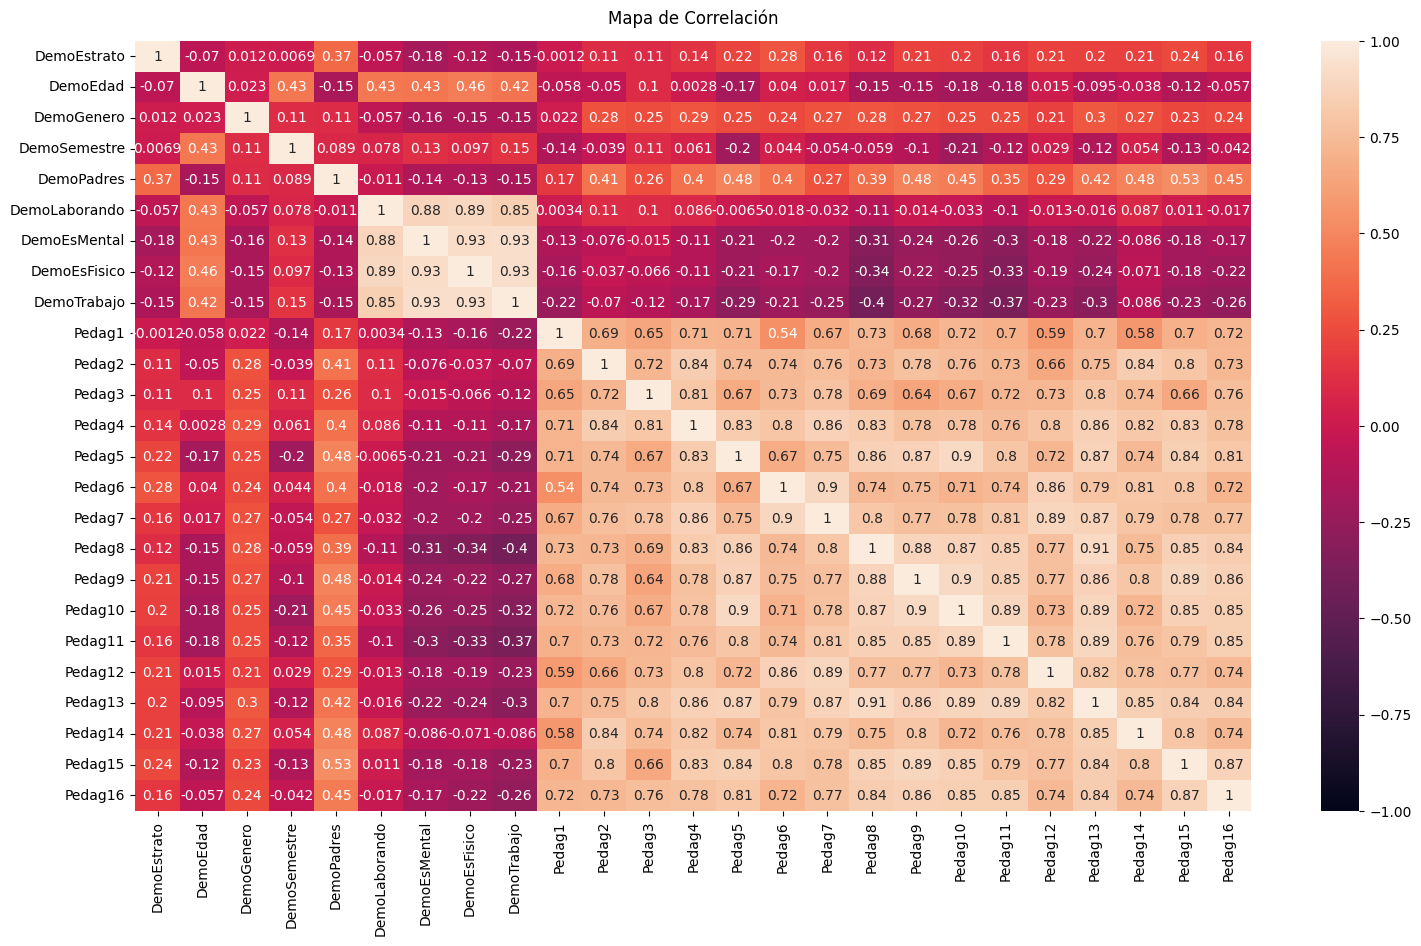

In [42]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [43]:
#!pip install pingouin
import pingouin as pg

pg.cronbach_alpha(data=X_train_norm_SMOTE)

datosOrg = X_train_norm_SMOTE[list(X_train_norm_SMOTE.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(np.float64(0.9097680561907152), array([0.887, 0.93 ]))

#### Normalizar datos trabajados con RESAMPLE

In [44]:
datosVie = data
dataLista = X_res_train_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_train_norm_RES = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [45]:
datosVie = data
dataLista = X_res_test_over

valores = dataLista.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=dataLista.columns)

normalizados = scaler.transform(valores)
X_test_norm_RES = pd.DataFrame(normalizados,
                              index=dataLista.index,
                              columns=dataLista.columns)

In [46]:
#Shapiro Wilk 
from scipy.stats import shapiro
valoresP=[]
concepto=[]
variable=[]

def iterarCol(df):
    for column in df:
        stat, p = shapiro(df[column].values)
        valoresP.append(p)
        variable.append(column)
        if (p < 0.05):
            #print(f'No es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('No es una variable Normal')
        else:
            #print(f'Es una variable Normal: {column}')
            #print('==========================================================')
            concepto.append('Es una variable Normal')
       
iterarCol(X_train_norm_RES)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,3.463585e-14,No es una variable Normal
1,DemoEdad,5.447752e-14,No es una variable Normal
2,DemoGenero,1.205734e-17,No es una variable Normal
3,DemoSemestre,6.207903e-16,No es una variable Normal
4,DemoPadres,1.130511e-17,No es una variable Normal
5,DemoLaborando,5.773183e-19,No es una variable Normal
6,DemoEsMental,1.045459e-17,No es una variable Normal
7,DemoEsFisico,1.122232e-17,No es una variable Normal
8,DemoTrabajo,4.013535e-18,No es una variable Normal
9,Pedag1,2.155731e-13,No es una variable Normal


In [47]:
iterarCol(X_test_norm_RES)


df = pd.DataFrame({'Variable':variable, 'Valores P':valoresP, 'Concepto':concepto})

df

,Variable,Valores P,Concepto
0,DemoEstrato,3.463585e-14,No es una variable Normal
1,DemoEdad,5.447752e-14,No es una variable Normal
2,DemoGenero,1.205734e-17,No es una variable Normal
3,DemoSemestre,6.207903e-16,No es una variable Normal
4,DemoPadres,1.130511e-17,No es una variable Normal
5,DemoLaborando,5.773183e-19,No es una variable Normal
6,DemoEsMental,1.045459e-17,No es una variable Normal
7,DemoEsFisico,1.122232e-17,No es una variable Normal
8,DemoTrabajo,4.013535e-18,No es una variable Normal
9,Pedag1,2.155731e-13,No es una variable Normal


In [48]:
corr_matrix = X_train_norm_RES.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
133,DemoLaborando,DemoTrabajo,0.984908,0.984908
205,DemoTrabajo,DemoLaborando,0.984908,0.984908
155,DemoEsMental,DemoLaborando,0.964622,0.964622
131,DemoLaborando,DemoEsMental,0.964622,0.964622
132,DemoLaborando,DemoEsFisico,0.961723,0.961723
180,DemoEsFisico,DemoLaborando,0.961723,0.961723
443,Pedag9,Pedag10,0.948600,0.948600
467,Pedag10,Pedag9,0.948600,0.948600
183,DemoEsFisico,DemoTrabajo,0.946294,0.946294
207,DemoTrabajo,DemoEsFisico,0.946294,0.946294


Text(0.5, 1.0, 'Mapa de Correlación')

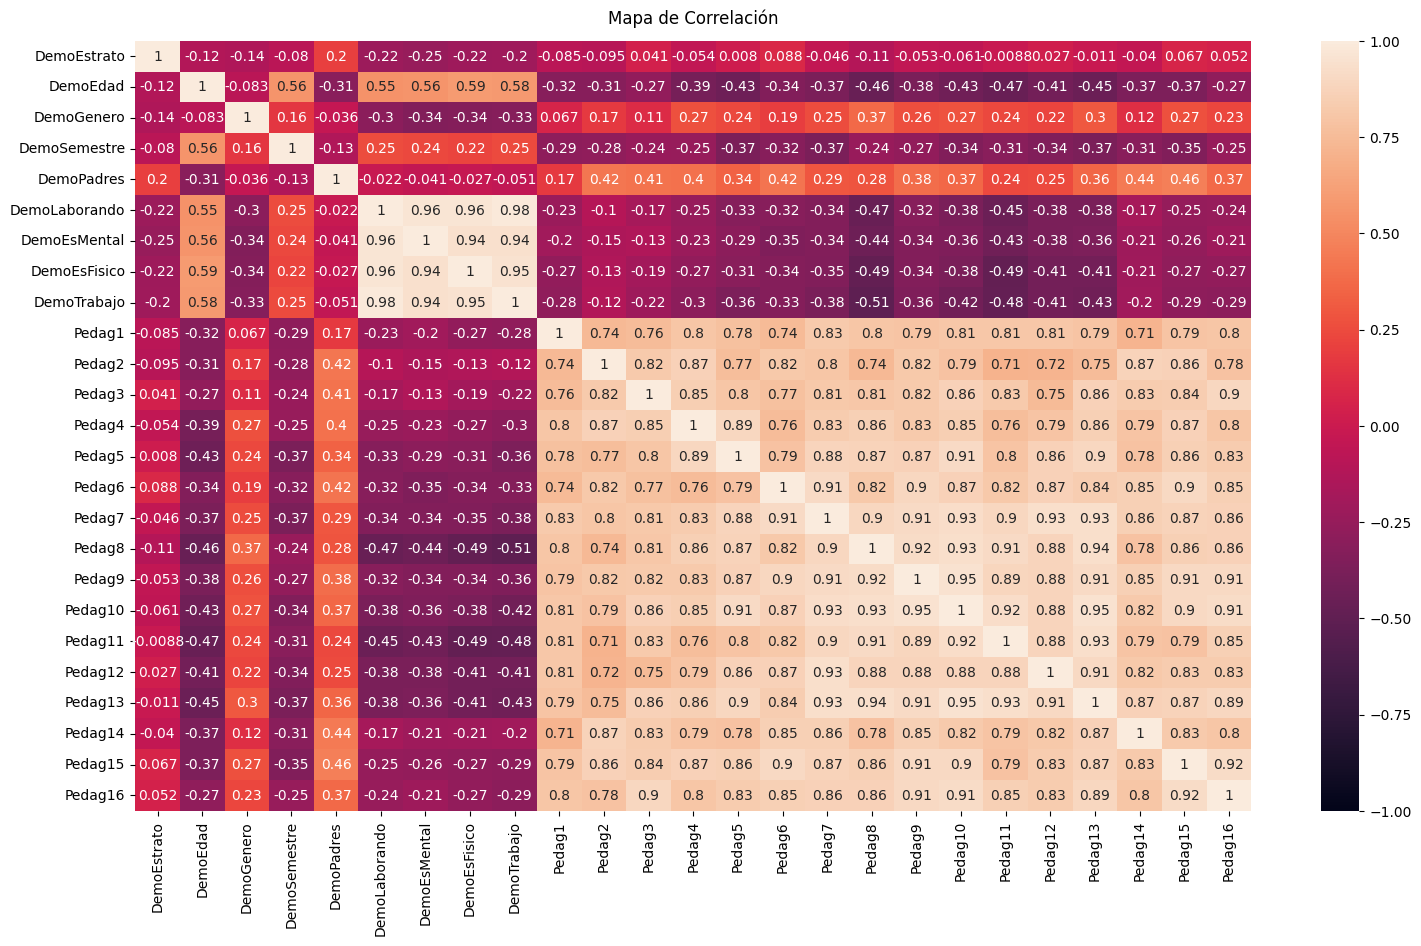

In [49]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [50]:
corr_matrix = X_test_norm_RES.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
155,DemoEsMental,DemoLaborando,0.974293,0.974293
131,DemoLaborando,DemoEsMental,0.974293,0.974293
132,DemoLaborando,DemoEsFisico,0.955844,0.955844
180,DemoEsFisico,DemoLaborando,0.955844,0.955844
183,DemoEsFisico,DemoTrabajo,0.950748,0.950748
207,DemoTrabajo,DemoEsFisico,0.950748,0.950748
181,DemoEsFisico,DemoEsMental,0.925072,0.925072
157,DemoEsMental,DemoEsFisico,0.925072,0.925072
262,Pedag2,Pedag4,0.919966,0.919966
310,Pedag4,Pedag2,0.919966,0.919966


Text(0.5, 1.0, 'Mapa de Correlación')

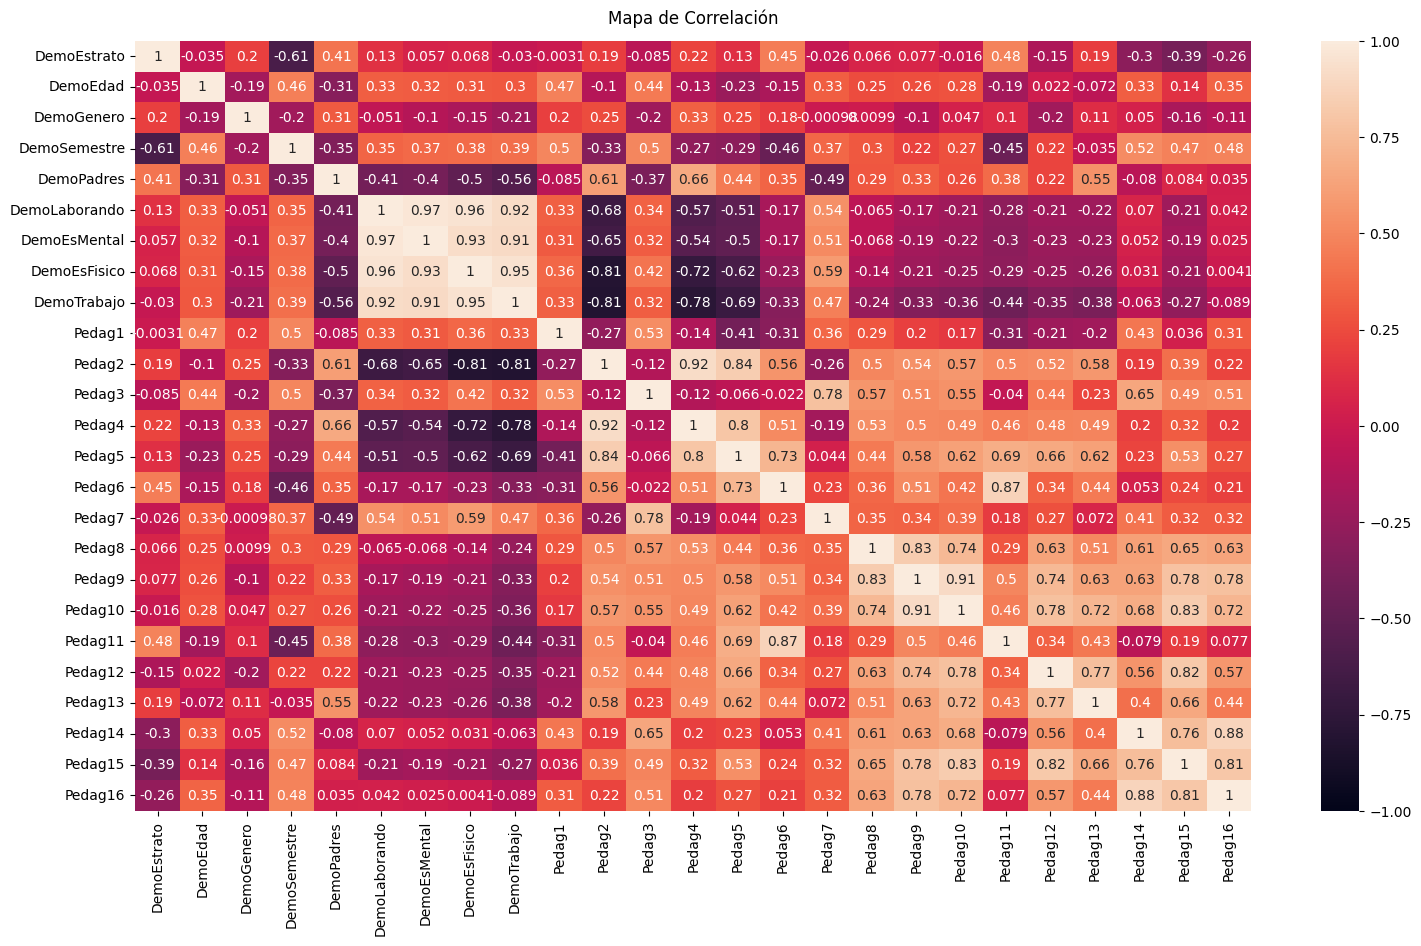

In [51]:
##https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python
plt.figure(figsize=(18, 10))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Mapa de Correlación', fontdict={'fontsize':12}, pad=12)

In [52]:
pg.cronbach_alpha(data=X_train_norm_RES)

datosOrg = X_train_norm_SMOTE[list(X_train_norm_RES.columns)]

pg.cronbach_alpha(data=datosOrg)
##Instrumento super confiable con 0.89

(np.float64(0.9097680561907152), array([0.887, 0.93 ]))

### Paso 5: Modelos Clasificacion sin y con Hiperparámetros, balanceado y sin mejores características

##### 1. Linear Discriminat Analysis: 70% train y 30% test

In [53]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = lda.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.3968253968253968


In [54]:
from sklearn.metrics import classification_report
 
print(classification_report(y_res_test_over, y_pred))
#https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        21
           1       0.28      0.43      0.34        21
           2       0.81      0.62      0.70        21

    accuracy                           0.40        63
   macro avg       0.43      0.40      0.40        63
weighted avg       0.43      0.40      0.40        63



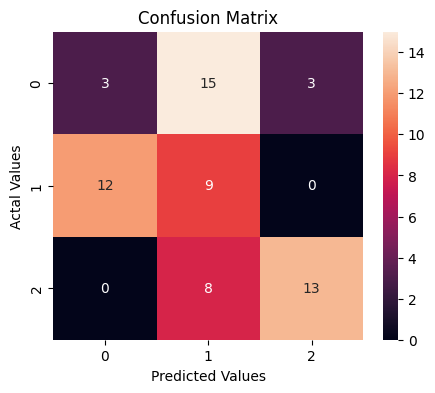

In [55]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_res_test_over, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()           

#### 1.1. Hiperparámetros LDA

In [56]:
# Crear el modelo
ldaHiper = LinearDiscriminantAnalysis()

# Definir el grid de hiperparámetros
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  # shrinkage solo aplica para 'lsqr' y 'eigen'
    'n_components': [1, 2],  # Número de componentes
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(ldaHiper , param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_lda = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lda.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'n_components': 1, 'shrinkage': 0.1, 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
Accuracy: 0.3968253968253968


In [57]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        21
           1       0.33      0.43      0.38        21
           2       0.62      0.62      0.62        21

    accuracy                           0.40        63
   macro avg       0.38      0.40      0.39        63
weighted avg       0.38      0.40      0.39        63



#### 2. Maquina de Soporte Vectorial SIN HIPERPARÁMETROS

Accuracy: 0.31746031746031744


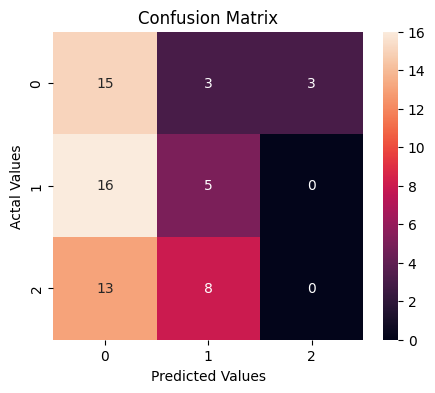

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Crear y entrenar el modelo
svc = SVC()
svc.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = svc.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = metrics.confusion_matrix(y_res_test_over, y_pred)

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()       

In [59]:
from sklearn.metrics import classification_report
 
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.71      0.46        21
           1       0.31      0.24      0.27        21
           2       0.00      0.00      0.00        21

    accuracy                           0.32        63
   macro avg       0.22      0.32      0.24        63
weighted avg       0.22      0.32      0.24        63



#### 2.1. Maquina de Soporte Vectorial CON HIPERPARÁMETROS

In [60]:
# Crear el modelo
svc = SVC()

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # relevante solo para el kernel 'poly'
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_svc = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_svc.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.31746031746031744


In [61]:
 
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.71      0.46        21
           1       0.31      0.24      0.27        21
           2       0.00      0.00      0.00        21

    accuracy                           0.32        63
   macro avg       0.22      0.32      0.24        63
weighted avg       0.22      0.32      0.24        63



### 3. Regresión Logistica Multinomial sin hiperparámetros

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.49206349206349204


In [63]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.24      0.29        21
           1       0.45      0.62      0.52        21
           2       0.62      0.62      0.62        21

    accuracy                           0.49        63
   macro avg       0.48      0.49      0.48        63
weighted avg       0.48      0.49      0.48        63



### 3.1. Regresión Logistica Multinomial con hiperparámetros

In [64]:
# Crear el modelo
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2', 'none'],  # 'none' solo está disponible para ciertos solvers
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_logreg = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_logreg.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Accuracy: 0.38095238095238093


In [65]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        21
           1       0.31      0.38      0.34        21
           2       0.59      0.62      0.60        21

    accuracy                           0.38        63
   macro avg       0.37      0.38      0.37        63
weighted avg       0.37      0.38      0.37        63



### 4. Naive Bayes sin hiperparámetros

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
gnb = GaussianNB()
gnb.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = gnb.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.12698412698412698


In [67]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.19      0.15        21
           1       0.18      0.19      0.19        21
           2       0.00      0.00      0.00        21

    accuracy                           0.13        63
   macro avg       0.10      0.13      0.11        63
weighted avg       0.10      0.13      0.11        63



### 4.1. Naive Bayes con hiperparámetros

In [68]:
# Crear el modelo
gnb = GaussianNB()

# Definir el grid de hiperparámetros
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_gnb = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gnb.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'var_smoothing': np.float64(1e-07)}
Accuracy: 0.12698412698412698


In [69]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.19      0.15        21
           1       0.18      0.19      0.19        21
           2       0.00      0.00      0.00        21

    accuracy                           0.13        63
   macro avg       0.10      0.13      0.11        63
weighted avg       0.10      0.13      0.11        63



### 5. Random Forest sin hiperparámetros

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
rf = RandomForestClassifier()
rf.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2698412698412698


In [71]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.62      0.41        21
           1       0.24      0.19      0.21        21
           2       0.00      0.00      0.00        21

    accuracy                           0.27        63
   macro avg       0.18      0.27      0.21        63
weighted avg       0.18      0.27      0.21        63



### 5.1. Random Forest con hiperparámetros

In [72]:
# Crear el modelo
rf = RandomForestClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.2698412698412698


In [73]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.38      0.33        21
           1       0.38      0.43      0.40        21
           2       0.00      0.00      0.00        21

    accuracy                           0.27        63
   macro avg       0.22      0.27      0.24        63
weighted avg       0.22      0.27      0.24        63



### 6. XGBoost sin hiperparámetros

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.15873015873015872


In [75]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.29      0.21        21
           1       0.19      0.19      0.19        21
           2       0.00      0.00      0.00        21

    accuracy                           0.16        63
   macro avg       0.12      0.16      0.13        63
weighted avg       0.12      0.16      0.13        63



### 6.1.  XGBoost con hiperparámetros

In [76]:
# Crear el modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.15873015873015872


In [77]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.29      0.21        21
           1       0.19      0.19      0.19        21
           2       0.00      0.00      0.00        21

    accuracy                           0.16        63
   macro avg       0.12      0.16      0.13        63
weighted avg       0.12      0.16      0.13        63



### 7.  GBM sin hiperparámetros

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo
gbm = GradientBoostingClassifier()
gbm.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = gbm.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.20634920634920634


In [79]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.43      0.30        21
           1       0.19      0.19      0.19        21
           2       0.00      0.00      0.00        21

    accuracy                           0.21        63
   macro avg       0.14      0.21      0.16        63
weighted avg       0.14      0.21      0.16        63



### 7.1.  GBM con hiperparámetros

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

# Crear el modelo
gbm = GradientBoostingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_gbm = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_gbm.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.3968253968253968


In [81]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.52      0.42        21
           1       0.48      0.67      0.56        21
           2       0.00      0.00      0.00        21

    accuracy                           0.40        63
   macro avg       0.28      0.40      0.33        63
weighted avg       0.28      0.40      0.33        63



### 8. Redes Neuronales sin hiperparámetros

In [82]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_norm_SMOTE, y_res_train_over)

# Predecir en el conjunto de prueba
y_pred = mlp.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.49206349206349204


In [83]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.24      0.29        21
           1       0.46      0.62      0.53        21
           2       0.59      0.62      0.60        21

    accuracy                           0.49        63
   macro avg       0.48      0.49      0.48        63
weighted avg       0.48      0.49      0.48        63



### 8.1. Redes Neuronales con hiperparámetros

In [84]:
# Crear el modelo
mlp = MLPClassifier(random_state=42, early_stopping=True)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train_norm_SMOTE, y_res_train_over)

# Mejor modelo
best_mlp = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_mlp.predict(X_test_norm_SMOTE)

# Evaluar el modelo
accuracy = accuracy_score(y_res_test_over, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy: 0.36507936507936506


In [85]:
print(classification_report(y_res_test_over, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.48      0.44        21
           1       0.00      0.00      0.00        21
           2       0.33      0.62      0.43        21

    accuracy                           0.37        63
   macro avg       0.25      0.37      0.29        63
weighted avg       0.25      0.37      0.29        63

